In [5]:
# importing the necessary libraries 
!pip install pandas-profiling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas EDA tool
import pandas_profiling as pp
from pandas_profiling import ProfileReport

#To Display all Columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

     -------------------------------------- 324.4/324.4 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 357.6/357.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.4/663.4 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 300.0/300.0 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 381.9/381.9 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 6.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=611988bcba35c4fd1d52654e58c615a252fceb032bc8990c337e40dd166f26e7
  Stored in directory: c:\use

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [ ]:
#LoadED Dataset

In [3]:
# Reading the csv data file and storing as the dataframe tc (telecom)
tc = pd.read_csv("telecom_churn_data.csv")

In [6]:
tc.shape ## Shape of Data

(99999, 226)

In [7]:
# Displaying the head of the DataFrame
tc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
# summary of the DataFrame
tc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [11]:
# Reading the csv data dictonary (telecom)
tc_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [12]:
# Displaying the dictionary items
tc_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [271]:
# 1. Data Cleaning
# Initial Statistical Analysis of the Data

In [13]:
# Generating the descriptive statistics
tc.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [14]:
# Getting the columns having a single value
# Empty list unique_col for storing column names
unique_col=[]
# running the loop for all the columns in the DataFrame
for i in tc.columns:
#     Counting number of distinct elements in column wise axis.
    if tc[i].nunique() == 1:   # check for unique value
        unique_col.append(i)  #  if yes then add that column in list
    else:
        pass # Pass if non unique column

tc.drop(unique_col, axis=1, inplace = True)
print("\n Columns dropped from the DataFrame\n", unique_col)
print("\nnumber of columns dropped = ", len(unique_col))


 Columns dropped from the DataFrame
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

number of columns dropped =  16


In [15]:
# Checking the sape after dropping columns
tc.shape

(99999, 210)

In [ ]:
# Missing Values % Calculation

In [16]:
# Detecting the missing values in the DataFrame
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6     74.85
fb_user_6           74.85
count_rech_3g_6     74.85
count_rech_2g_6     74.85
night_pck_user_6    74.85
                    ...  
max_rech_amt_9       0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
sep_vbc_3g           0.00
Length: 210, dtype: float64

In [272]:
#Converting columns with datetime values to datetime format

In [17]:
# Date columns based on the column dtypes of object.

date_col= tc.select_dtypes(include=['object'])
print("\nFollowing columns misrepresented as object\n",date_col.columns)

# Converting the columns of date_col to datetime format
for i in date_col.columns:
    tc[i] = pd.to_datetime(tc[i])


Following columns misrepresented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [18]:
# check for conversion of format
tc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

In [ ]:
# Missing Values Imputation
# Missing Value Imputation for "Data Recharge" Columns

In [19]:
# Checking the columns with `data recharge` attributes
tc[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0


In [21]:
'''
 As we can see that when there is no data in date_of_last_rech_data_6, Furthere total_rech_data_6 and max_rech_data_6 are also missing which indicating that the customer has not made a internet recharge

 Thus this is can be consideed as meaningful missing.

 Hence, imputing 0 for their values for all such cases in month 6, 7, 8 and 9
'''

'\n As we can see that when there is no data in date_of_last_rech_data_6, Furthere total_rech_data_6 and max_rech_data_6 are also missing which indicating that the customer has not made a internet recharge\n\n Thus this is can be consideed as meaningful missing.\n\n Hence, imputing 0 for their values for all such cases in month 6, 7, 8 and 9\n'

In [23]:
# Imputing 0 for missing values
for i in range(len(tc)):
  # Imputing 'total_rech_data', 'max_rech_data' for month 6
    if pd.isnull((tc['total_rech_data_6'][i]) and (tc['max_rech_data_6'][i])):
        if pd.isnull(tc['date_of_last_rech_data_6'][i]):
            tc['total_rech_data_6'][i]=0
            tc['max_rech_data_6'][i]=0

  # Imputing 'total_rech_data', 'max_rech_data' for month 7
    if pd.isnull((tc['total_rech_data_7'][i]) and (tc['max_rech_data_7'][i])):
        if pd.isnull(tc['date_of_last_rech_data_7'][i]):
            tc['total_rech_data_7'][i]=0
            tc['max_rech_data_7'][i]=0

  # Imputing 'total_rech_data', 'max_rech_data' for month 8
    if pd.isnull((tc['total_rech_data_8'][i]) and (tc['max_rech_data_8'][i])):
        if pd.isnull(tc['date_of_last_rech_data_8'][i]):
            tc['total_rech_data_8'][i]=0
            tc['max_rech_data_8'][i]=0

        
  # Imputing 'total_rech_data', 'max_rech_data' for month 9 
    if pd.isnull((tc['total_rech_data_9'][i]) and (tc['max_rech_data_9'][i])):
        if pd.isnull(tc['date_of_last_rech_data_9'][i]):
            tc['total_rech_data_9'][i]=0
            tc['max_rech_data_9'][i]=0

In [24]:
# Checking columns with count recharge attributes
tc[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head()

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0


In [26]:
'''
As we can see that when there is no data in total_rech_data_6. Also count_rech_2g_6 and count_rech_3g_6 are also missing which shows that the customer has not recharged for internet

Also, we can see that the total of count_rech_2g_6 and count_rech_3g_6 gives total_rech_data_6

Therefore, we will drop the count_rech_2g_6 and count_rech_3g_6as it causes the multicollinearity issue.

Further doing the same for all values for all such cases in month 6, 7, 8 and 9
'''

'\nAs we can see that when there is no data in total_rech_data_6. Also count_rech_2g_6 and count_rech_3g_6 are also missing which shows that the customer has not recharged for internet\n\nAlso, we can see that the total of count_rech_2g_6 and count_rech_3g_6 gives total_rech_data_6\n\nTherefore, we will drop the count_rech_2g_6 and count_rech_3g_6as it causes the multicollinearity issue.\n\nFurther doing the same for all values for all such cases in month 6, 7, 8 and 9\n'

In [27]:
# Dropping columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tc.drop(['count_rech_2g_6', 'count_rech_3g_6',
       'count_rech_2g_7','count_rech_3g_7',
       'count_rech_2g_8','count_rech_3g_8',
       'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [28]:
# Checking dimensions after dropping.
tc.shape

(99999, 202)

In [ ]:
# Handeling Missing Values for count arpu_3g and arpu_2g columns against months 6,7,8 and 9

In [29]:
# Checking the columns with `arpu` attributes
tc[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0


In [30]:
# Checking for correlation between the "arpu_3g", "arpu_2g", "av_rech_amt_data" columns for months 6,7,8 and 9
print("Correlation table for month 6\n\n", tc[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tc[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tc[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tc[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

In [32]:
"""
As there is very high correlation between arpu_2g_* and arpu_3g_* with av_rech_amt_data*

Hence dropping the arpu_2g_* and arpu_3g_* as to avoid multicollinearity issues

Reapeating the same for months 7, 8 and 9

"""

'\nAs there is very high correlation between arpu_2g_* and arpu_3g_* with av_rech_amt_data*\n\nHence dropping the arpu_2g_* and arpu_3g_* as to avoid multicollinearity issues\n\nReapeating the same for months 7, 8 and 9\n\n'

In [33]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 
tc.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [34]:
# Checking Shape after dropping.
tc.shape

(99999, 194)

In [35]:
"""
Handling Missing Values for columns having above 50% missing values
The column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50%

Hence drop the fb_user_* and night_pck_user_* as not aiding for further analysis

Also doing this for all months 6, 7, 8 and 9
"""

'\nHandling Missing Values for columns having above 50% missing values\nThe column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50%\n\nHence drop the fb_user_* and night_pck_user_* as not aiding for further analysis\n\nAlso doing this for all months 6, 7, 8 and 9\n'

In [36]:
tc.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

In [37]:
# Checking Shape after dropping.
tc.shape

(99999, 186)

In [ ]:
# Handling the missing values for av_rech_amt_data_* for months 6,7,8 and 9

In [38]:
# Checking the related columns values
tc[['av_rech_amt_data_6','total_rech_data_6']].head()

,av_rech_amt_data_6,total_rech_data_6
0,252.0,1.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,56.0,1.0


In [39]:
"""

If total_rech_data_6 is zero then av_rech_amt_data_6 also zero

Hence, impute the NaN in the arpav_rech_amt_data_6 with 0 if total_rech_data_6* is 0

Also doing this for all months 6, 7, 8 and 9

"""

'\n\nIf total_rech_data_6 is zero then av_rech_amt_data_6 also zero\n\nHence, impute the NaN in the arpav_rech_amt_data_6 with 0 if total_rech_data_6* is 0\n\nAlso doing this for all months 6, 7, 8 and 9\n\n'

In [40]:
# Checking for condition & imputating with 0

for i in range(len(tc)):
  # Imputing for month 6
    if (pd.isnull(tc['av_rech_amt_data_6'][i]) and (tc['total_rech_data_6'][i]==0)):
        tc['av_rech_amt_data_6'][i] = 0

  # Imputing for month 7
    if (pd.isnull(tc['av_rech_amt_data_7'][i]) and (tc['total_rech_data_7'][i]==0)):
        tc['av_rech_amt_data_7'][i] = 0

  # Imputing for month 8
    if (pd.isnull(tc['av_rech_amt_data_8'][i]) and (tc['total_rech_data_8'][i]==0)):
        tc['av_rech_amt_data_8'][i] = 0

  # Imputing for month 9
    if (pd.isnull(tc['av_rech_amt_data_9'][i]) and (tc['total_rech_data_9'][i]==0)):
        tc['av_rech_amt_data_9'][i] = 0

In [41]:
# Checking for % missing values in other attributes
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
                            ...  
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
sep_vbc_3g                   0.00
Length: 186, dtype: float64

In [59]:
# Checking info of the dataframe
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 182 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(144), int64(34)
memory usage: 138.9 MB


In [60]:
"""
The attribute :date_of_last_rech_data_* is of no use now as attributes total_rech_data_* & max_rech_data_* have already been imputed

Further attribute date_of_last_rech_*" is of no use now as we have already used the datetime column

Hence as the missing value percentage is high for this column the attribute can be dropped.

Also doing this for all months 6, 7, 8 and 9

"""

'\nThe attribute :date_of_last_rech_data_* is of no use now as attributes total_rech_data_* & max_rech_data_* have already been imputed\n\nFurther attribute date_of_last_rech_*" is of no use now as we have already used the datetime column\n\nHence as the missing value percentage is high for this column the attribute can be dropped.\n\nAlso doing this for all months 6, 7, 8 and 9\n\n'

In [269]:
# Dropping the columns related to datetime dtype from the DataFrame
#tc.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                  # "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")



The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



In [63]:
# Dropping the columns related to datetime dtype from the DataFrame
tc.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [270]:
# Checking Shape after dropping.
tc.shape

(30001, 133)

In [65]:
"""
Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column
"""

'\nSince the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column\n'

In [ ]:
# Feature Engineering to create new columns

In [66]:
# Since, we have only average recharge amount for Customer we need the total recharge amount


 # Calculating the total recharge amount done for data alone in months 6
tc['total_rech_amt_data_6']=tc['av_rech_amt_data_6'] * tc['total_rech_data_6']
 # Calculating the total recharge amount done for data alone in months 7
tc['total_rech_amt_data_7']=tc['av_rech_amt_data_7'] * tc['total_rech_data_7']

# Calculating the overall recharge amount ( Data + Call) for the months 6
tc['overall_rech_amt_6'] = tc['total_rech_amt_data_6'] + tc['total_rech_amt_6']
# Calculating the overall recharge amount ( Data + Call) for the months 7
tc['overall_rech_amt_7'] = tc['total_rech_amt_data_7'] + tc['total_rech_amt_7']

# Calculating the average recharge done by customer in months 6th and 7th
tc['avg_rech_amt_6_7'] = (tc['overall_rech_amt_6'] + tc['overall_rech_amt_7'])/2

In [67]:
# 2.Filtering the High Value Customer

In [68]:
# Finding the value of 70th percentile in the overall revenues defining the high value customer creteria for the company

cut_off = tc['avg_rech_amt_6_7'].quantile(0.70)
print("The 70th quantile value to determine the High Value Customer is: ",cut_off,)

# Considering only the top 30 % based on the average recharge amount as High Value Customer
tc = tc[tc['avg_rech_amt_6_7'] >= cut_off]

The 70th quantile value to determine the High Value Customer is:  478.0


In [69]:
# Checking Shape after dropping.
tc.shape

(30001, 183)

In [70]:
# Checking the missing values percentages again for the HVC (High Value Customer) group

((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

In [ ]:
# Imuting the remaining attributes with advanced imputation technique like KNNImputer

In [71]:
# Ceaating a tuple for Numerical values
num_col = tc.select_dtypes(include = ['int64','float64']).columns.tolist()

In [72]:
# Importing the libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Transforming features by scaling each feature to a given range.
scalar = MinMaxScaler()
    
# Scaling and transforming the data for the columns that are numerical
tc[num_col]=scalar.fit_transform(tc[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
tc_knn = pd.DataFrame(knn.fit_transform(tc[num_col]))
tc_knn.columns=tc[num_col].columns

In [73]:
# check for any null values after imputation for numerical columns
tc_knn.isnull().sum().sum()

0

In [ ]:
# KNN Imputer has imputed all missing values successfully

In [74]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
# We need to restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
tc[num_col]=scalar.inverse_transform(tc_knn)

# Checking the top 10 data
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0


In [75]:
# Final Check for missing values
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_8        0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
                   ... 
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
avg_rech_amt_6_7    0.0
Length: 183, dtype: float64

In [76]:
"""

      3.Defining Target Variable
Churn variable
There are 2 types of Churn

Usage Based Churn : Completely inactive Customers
Incoming Services: Inactive

Outgoing services - Inactive

Data services(2g, 3g) - Inactive

Revenue Based Churn : Partial Inactive Customers
Incoming Services : Active

Outgoing services - Inactive

Data services(2g, 3g) - Inactive


9th Month is our Churn Phase. Usage-based churn For that, we need to derive churn variable using
total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 & vol_3g_mb_9 attributes


"""

'\n\n      3.Defining Target Variable\nChurn variable\nThere are 2 types of Churn\n\nUsage Based Churn : Completely inactive Customers\nIncoming Services: Inactive\n\nOutgoing services - Inactive\n\nData services(2g, 3g) - Inactive\n\nRevenue Based Churn : Partial Inactive Customers\nIncoming Services : Active\n\nOutgoing services - Inactive\n\nData services(2g, 3g) - Inactive\n\n\n9th Month is our Churn Phase. Usage-based churn For that, we need to derive churn variable using\ntotal_ic_mou_9,total_og_mou_9,vol_2g_mb_9 & vol_3g_mb_9 attributes\n\n\n'

In [77]:
#Calculation of total incoming and outgoing minutes of usage & 2g and 3g data consumption

In [78]:
# Selecting the columns defining the churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tc[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [ ]:
# Those who have not used either calls or internet in the month of semptember are the customers who have churned

In [79]:
# Defining the churn variable:
tc['churn']=0

# Imputing the churn values based on the condition:
# Total incoming Mou ==0 and
# Total outgoing Mou ==0 and
# Total  2g Data ==0 and
# Total  3g Data ==0
# if everything is zero for the customers then tag it as zero else 1
tc['churn'] = np.where(tc[churn_col].sum(axis=1) == 0, 1, 0)

In [80]:
# Checking the head of the data frame
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0


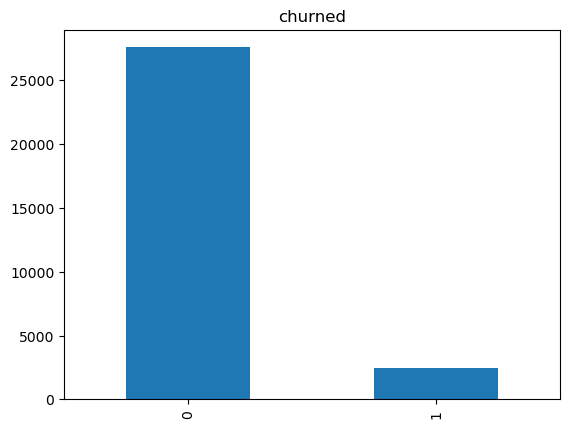

In [81]:
# Barplot of the churned values
tc['churn'].value_counts().plot(kind ='bar').set_title('churned')
plt.show()

0    91.863605
1     8.136395
Name: churn, dtype: float64


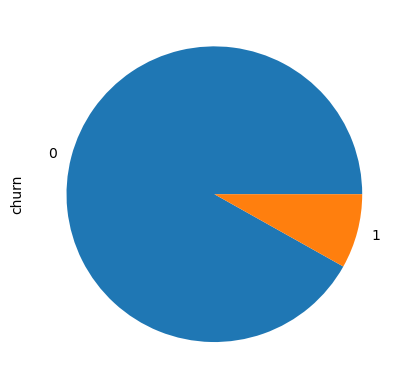

In [82]:
# Checking for churn/non churn percentage for data distribution
print((tc['churn'].value_counts()/len(tc))*100)
((tc['churn'].value_counts()/len(tc))*100).plot(kind="pie")
plt.show()

In [89]:
# Since, 92% of the customers do not churn, So, this will lead to a case of class imbalance
# Delete columns that belong to the churn month

# Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped form the DataFrame.
# Since, we have used it to derive the target column, if we use it to train the Machine Learning model. Then, our machine learning model will overfit the month 9 (semptember) data

In [83]:
# Selecting all the churn columns

churn_phase_cols = [col for col in tc.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [84]:
# Dropping the selected churn columns
tc.drop(churn_phase_cols, axis=1, inplace=True)

# Checking new dimensions
tc.shape

(30001, 141)

In [85]:
# Dropping further unwanted columns
tc.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [87]:
# Checking for correlation of the indepedent variables and try to understand their dependencies.

In [88]:
# creating a list of column names for each month
mon_6_cols = [col for col in tc.columns if '_6' in col]
mon_7_cols = [col for col in tc.columns if '_7' in col]
mon_8_cols = [col for col in tc.columns if '_8' in col]

In [90]:
# Checking the correlation amongst the independent variables & drop the highly correlated variables
tc_corr = tc.corr()
tc_corr.loc[:,:] = np.tril(tc_corr, k=-1)
tc_corr = tc_corr.stack()
tc_corr
tc_corr[(tc_corr > 0.80) | (tc_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [91]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinear with other predictor variables.
# Setting criteria collinearity as 85%

#  dropping these column
tc.drop(col_to_drop, axis=1, inplace=True)

In [92]:
# Checking new dimensions
tc.shape

(30001, 121)

In [95]:
# 4.Data Preparation
# Deriving New Variables

In [93]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
tc['tenure'] = (tc['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
tc.drop('aon',axis=1, inplace=True)

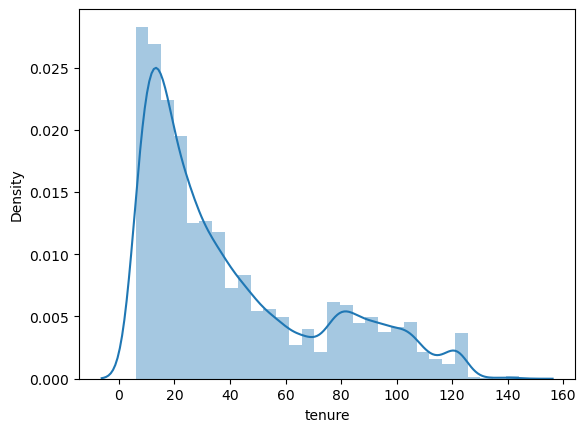

In [94]:
# Checking the distribution of he tenure variable

sns.distplot(tc['tenure'],bins=30)
plt.show()

In [96]:
# Bucketing Data
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tc['tenure_range'] = pd.cut(tc['tenure'], tn_range, labels=tn_label)
tc['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

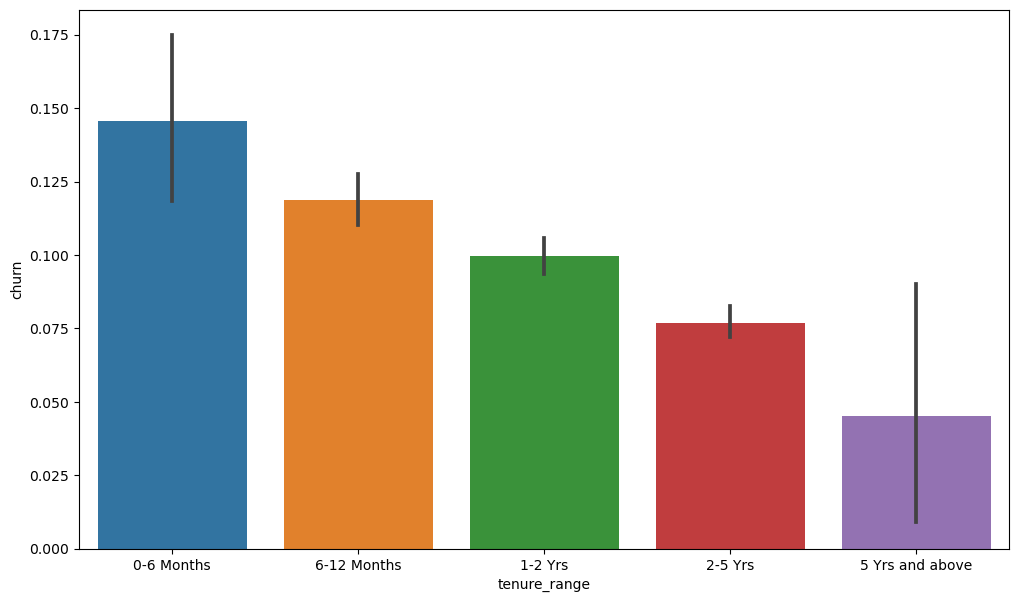

In [262]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tc)
plt.show()

In [ ]:
# Here it can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the tenure of customer increases.

# The average revenue per user is good customer is given by arpu_6 and arpu_7. since we have two seperate averages, hence take an average to these two and drop the other columns.

In [98]:
tc["avg_arpu_6_7"]= (tc['arpu_6']+tc['arpu_7'])/2
tc['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [99]:
#Dropping the original column
tc.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# Checking new shape
tc.shape

(30001, 121)

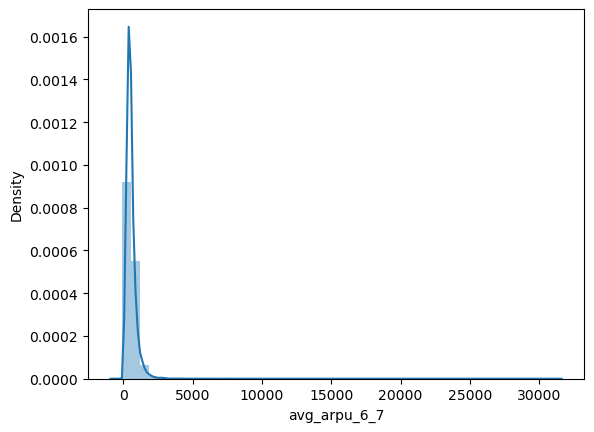

In [100]:
# Visualizing the column created
sns.distplot(tc['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

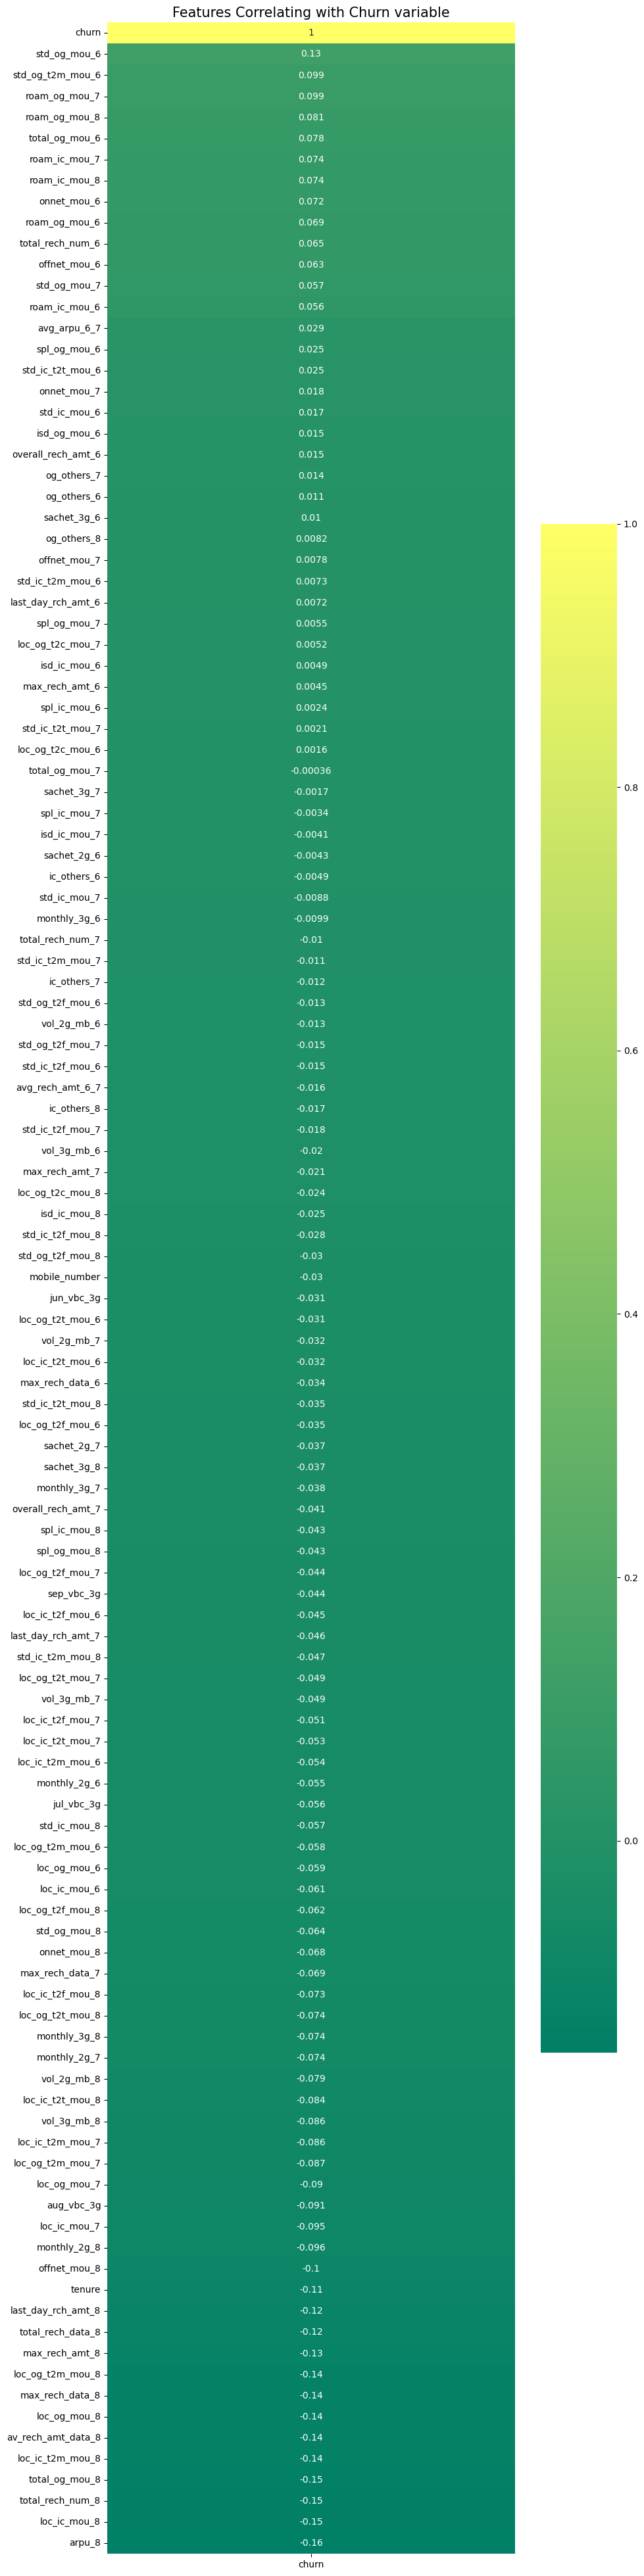

In [101]:
# Checking Correlation between target variable(SalePrice) with the other variable in the DataFrame
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tc.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [102]:
#Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
# Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

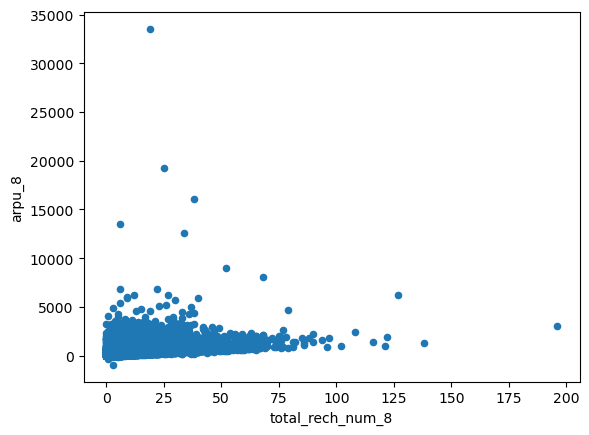

In [103]:
# Ploting a scatter plot between total recharge and avg revenue for the 8th month
tc[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()


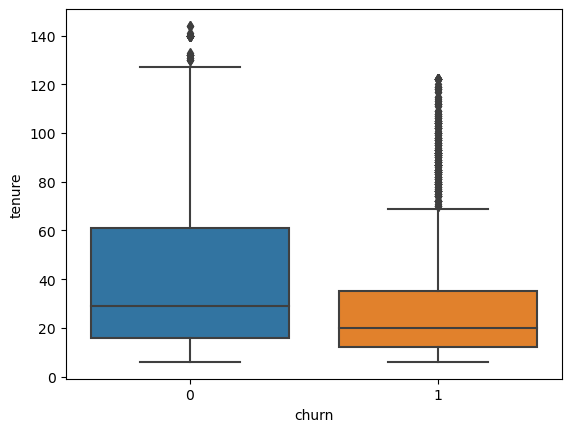

In [104]:
sns.boxplot(x = tc.churn, y = tc.tenure)

plt.show()

In [ ]:
# From the above plot , its clear long tenure customers do no churn

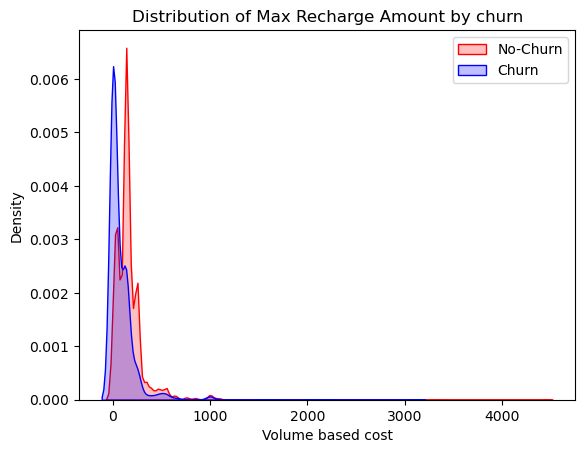

In [105]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(tc.max_rech_amt_8[(tc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tc.max_rech_amt_8[(tc["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

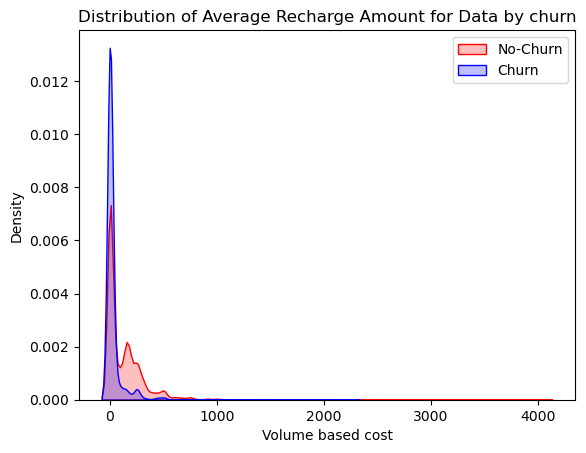

In [106]:
# churn vs max recharge amount
ax = sns.kdeplot(tc.av_rech_amt_data_8[(tc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tc.av_rech_amt_data_8[(tc["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [120]:
# Creating categories for month 8 column totalrecharge and their count
tc['total_rech_data_group_8'] = pd.cut(
    tc['total_rech_num_8'],
    [-1, 0, 10, 25, 1000],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)
tc['total_rech_num_group_8'] = pd.cut(
    tc['total_rech_num_8'],
    [-1, 0, 10, 25, 1000],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# tc['total_rech_num_group_8']=pd.cut(tc['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Rec

					Distribution of total_rech_data_8 variable
 <=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: total_rech_data_group_8, dtype: int64


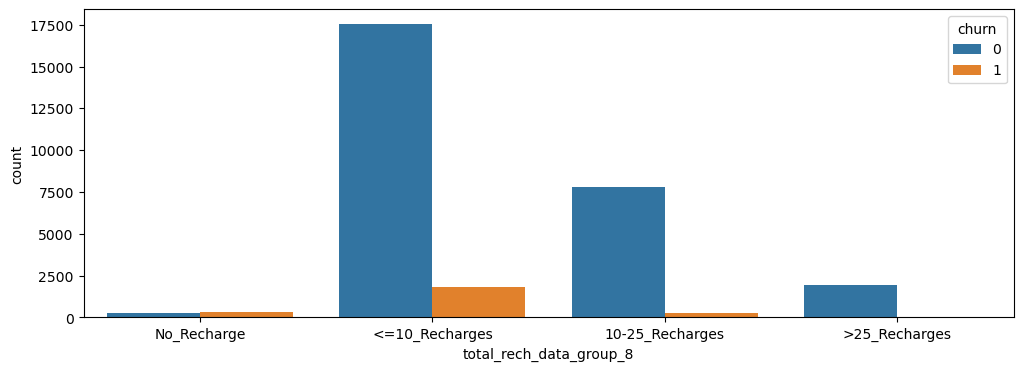

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


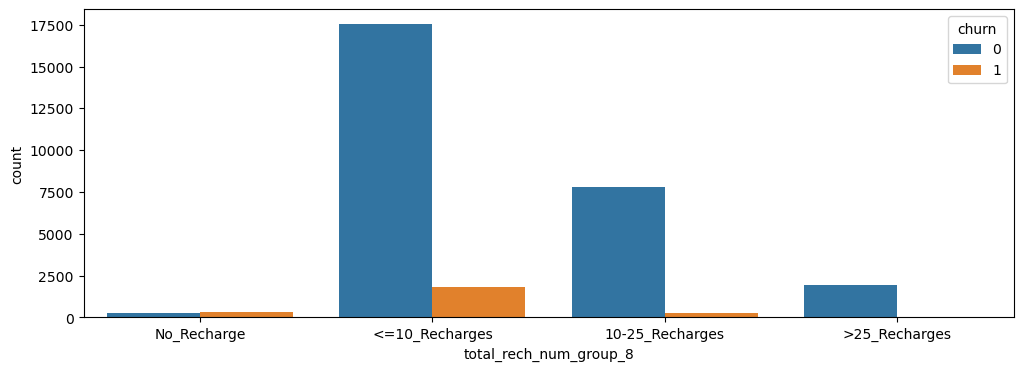

In [121]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=tc,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",tc['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=tc,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",tc['total_rech_num_group_8'].value_counts())
plt.show()

In [109]:
# 5.Data Modeling

In [122]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tc[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,1,0,0,1,0,0,0,0,1,0
8,0,1,0,0,1,0,1,0,0,0
21,0,0,1,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [123]:
# Adding the results to the master dataframe
tc = pd.concat([tc, dummy], axis=1)
tc.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,...,1,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,...,0,1,0,0,1,0,1,0,0,0
21,7.002124e+09,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,...,0,0,1,0,0,1,0,1,0,0
23,7.000887e+09,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [125]:
# Creating a copy of the filtered dataframe

df=tc[:].copy()

# Dropping unwanted columns
#df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, i

# Dropping specified columns from the DataFrame
df.drop(['tenure_range', 'mobile_number', 'total_rech_data_group_8', 'total_rech_num_group_8', 'sep_vbc_3g', 'tenure'], axis=1, inplace=True)


In [126]:
# Checking the head of the DataFrame
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,1,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,0,1,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,1,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [127]:
# Creating X DataFrame for model building.
X = df.drop(['churn'],axis=1)

In [128]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,1,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,0,1,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,1,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [129]:
# lets create y DataFrame for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [130]:
# split the dateset into train and test DataFrame
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


Text(0.5, 1.0, 'churned')

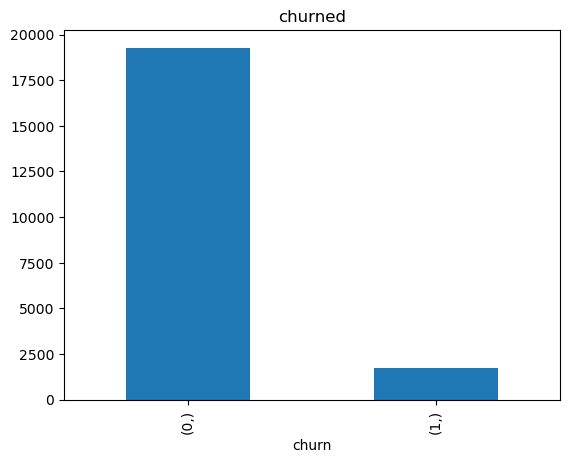

In [131]:
# Visualizing the  counts of unique rows in the y_train of the DataFrame

pd.DataFrame(y_train).value_counts().plot(kind ='bar').set_title('churned')

In [132]:
# Printing DataFrame information 
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [133]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [134]:
# apply scaling on the DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [135]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,0,1,0,0,1,0,1,0,0,0
92007,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
56403,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,1,0,0,1,0,0,1,0,0


In [137]:
# Handling Class Imbalance


In [136]:
"""
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

"""

'\nUsing SMOTE method, we can balance the data w.r.t. churn variable and proceed further\n\n'

In [138]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [139]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


Text(0.5, 1.0, 'churned')

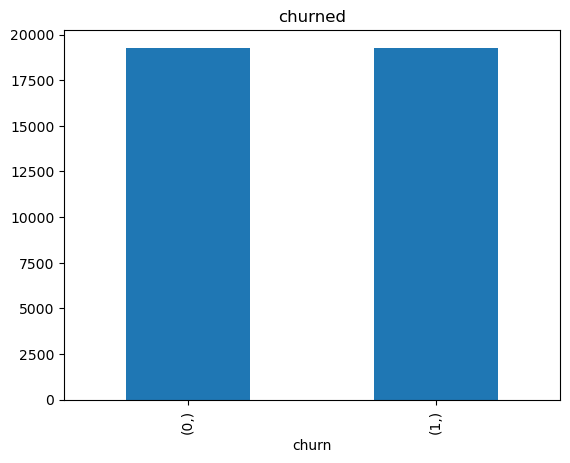

In [140]:
# Visualizing the  counts of unique rows in the y_train_sm of the DataFrame

pd.DataFrame(y_train_sm).value_counts().plot(kind ='bar').set_title('churned')

In [ ]:
# From the above Graph it is clear that the problem of class imbalance has been resolved in y_train_sm

In [ ]:
# 6.Logistic Regression

In [141]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [142]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38453
Model Family:                Binomial   Df Model:                          122
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13718.
Date:                Tue, 12 Dec 2023   Deviance:                       27436.
Time:                        11:41:18   Pearson chi2:                 7.04e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4909
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0241      0.151      6.781      0.000       0.728       1.320
arpu_8                                      4.7518      1.743      2.727      0.006       1.336       8.167
onnet_mou_6                               -47.2459     28.346     -1.667      0.096    -102.804       8.312
onnet_mou_7                                52.5837     16.592      3.169      0.002      20.064      85.103
onnet_mou_8                               189.3409     24.234      7.813      0.000     141.844     236.838
offnet_mou_6                              -44.3733     31.960     -1.388      0.165    -107.014      18.268
offnet_mou_7                               64.2770     19.620      3.276      0.001      25.823     102.731
offnet_mou_8                              244.2231     31.529      7.746      0.000     182.428     306.019
roam_ic_mou_6                               3.0443      0.849      3.585      0.000       1.380       4.709
roam_ic_mou_7                               4.6350      1.553      2.985      0.003       1.591       7.679
roam_ic_mou_8                              -1.1087      0.727     -1.525      0.127      -2.533       0.316
roam_og_mou_6                              20.3283     14.484      1.403      0.160      -8.061      48.717
roam_og_mou_7                             -10.7479      3.884     -2.767      0.006     -18.360      -3.136
roam_og_mou_8                             -59.3524      7.838     -7.572      0.000     -74.715     -43.990
loc_og_t2t_mou_6                        -1.005e+04      2e+04     -0.503      0.615   -4.92e+04    2.91e+04
loc_og_t2t_mou_7                        -2777.9540    2.3e+04     -0.121      0.904   -4.78e+04    4.23e+04
loc_og_t2t_mou_8                         1.835e+05   3.45e+04      5.315      0.000    1.16e+05    2.51e+05
loc_og_t2m_mou_6                        -7397.1979   1.47e+04     -0.504      0.614   -3.62e+04    2.14e+04
loc_og_t2m_mou_7                        -1678.3187   1.38e+04     -0.121      0.904   -2.88e+04    2.55e+04
loc_og_t2m_mou_8                         6.054e+04   1.14e+04      5.316      0.000    3.82e+04    8.29e+04
loc_og_t2f_mou_6                        -1055.9704   2100.078     -0.503      0.615   -5172.047    3060.107
loc_og_t2f_mou_7                         -409.6077   3286.811     -0.125      0.901   -6851.639    6032.424
loc_og_t2f_mou_8                         1.585e+04   2981.101      5.317      0.000       1e+04    2.17e+04
loc_og_t2c_mou_6                           -6.4173      1.096     -5.856      0.000      -8.565      -4.269
loc_og_t2c_mou_7                            2.7983      1.830      1.529      0.126      -0.789       6.386
loc_og_t2c_mou_8                            0.6134      1.2

In [143]:
# Logistic Regression using Feature Selection (RFE method)

In [144]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
# changed it here
# considering for all the 
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [145]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [146]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [147]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 23),
 ('onnet_mou_7', False, 32),
 ('onnet_mou_8', False, 37),
 ('offnet_mou_6', False, 22),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', False, 36),
 ('roam_ic_mou_6', False, 14),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 74),
 ('roam_og_mou_6', False, 80),
 ('roam_og_mou_7', False, 27),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 61),
 ('loc_og_t2t_mou_7', False, 101),
 ('loc_og_t2t_mou_8', False, 17),
 ('loc_og_t2m_mou_6', False, 99),
 ('loc_og_t2m_mou_7', False, 63),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 102),
 ('loc_og_t2f_mou_7', False, 6),
 ('loc_og_t2f_mou_8', False, 28),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 105),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 104),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 97),
 ('std_og_t2f_mou_6', False, 82),
 ('std_og_t2f_mou_7', False, 30),
 ('std_og_t2f_mou_8'

In [148]:
# Assessing the model with StatsModels

In [149]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15690.
Date:                Tue, 12 Dec 2023   Deviance:                       31380.
Time:                        11:45:58   Pearson chi2:                 2.52e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4361
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5474      0.070      7.778      0.000       0.409       0.685
arpu_8                -7.5196      1.287     -5.843      0.000     -10.042      -4.997
roam_ic_mou_7          8.1494      0.925      8.815      0.000       6.337       9.961
roam_og_mou_8          4.1970      0.590      7.119      0.000       3.042       5.353
loc_og_t2m_mou_8      -4.2655      0.668     -6.388      0.000      -5.574      -2.957
std_og_mou_7           6.8559      0.505     13.582      0.000       5.867       7.845
total_og_mou_8       -18.7453      0.938    -19.994      0.000     -20.583     -16.908
loc_ic_t2t_mou_8       4.7829      4.237      1.129      0.259      -3.521      13.087
loc_ic_t2m_mou_8       2.4328      4.640      0.524      0.600      -6.662      11.528
loc_ic_mou_6           8.4319      0.713     11.825      0.000       7.034       9.829
loc_ic_mou_8         -35.3226      5.242     -6.738      0.000     -45.597     -25.049
std_ic_mou_8         -11.7674      1.363     -8.635      0.000     -14.438      -9.096
spl_ic_mou_8         -18.7695      1.348    -13.923      0.000     -21.412     -16.127
total_rech_num_8      -7.2446      0.530    -13.666      0.000      -8.284      -6.206
last_day_rch_amt_8   -18.6996      0.816    -22.914      0.000     -20.299     -17.100
total_rech_data_8    -10.6150      0.663    -16.008      0.000     -11.915      -9.315
av_rech_amt_data_8    -6.2016      0.674     -9.205      0.000      -7.522      -4.881
vol_2g_mb_8          -10.8457      0.989    -10.970      0.000     -12.784      -8.908
monthly_2g_8          -6.1561      0.376    -16.391      0.000      -6.892      -5.420
aug_vbc_3g            -6.2400      0.588    -10.609      0.000      -7.393      -5.087
avg_arpu_6_7          19.1812      1.089     17.608      0.000      17.046      21.316
======================================================================================
"""

In [150]:
# From the p-value of the individual columns, 
    # Drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [151]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15691.
Date:                Tue, 12 Dec 2023   Deviance:                       31381.
Time:                        11:46:23   Pearson chi2:                 2.58e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4361
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5454      0.070      7.749      0.000       0.407       0.683
arpu_8                -7.5210      1.287     -5.843      0.000     -10.044      -4.998
roam_ic_mou_7          8.1645      0.925      8.823      0.000       6.351       9.978
roam_og_mou_8          4.2007      0.590      7.122      0.000       3.045       5.357
loc_og_t2m_mou_8      -4.2710      0.668     -6.397      0.000      -5.580      -2.962
std_og_mou_7           6.8444      0.505     13.563      0.000       5.855       7.833
total_og_mou_8       -18.7147      0.937    -19.970      0.000     -20.551     -16.878
loc_ic_t2m_mou_8      -2.1741      2.159     -1.007      0.314      -6.406       2.058
loc_ic_mou_6           8.4447      0.714     11.835      0.000       7.046       9.843
loc_ic_mou_8         -29.8683      1.949    -15.328      0.000     -33.687     -26.049
std_ic_mou_8         -11.8027      1.363     -8.657      0.000     -14.475      -9.130
spl_ic_mou_8         -18.7555      1.348    -13.916      0.000     -21.397     -16.114
total_rech_num_8      -7.2173      0.530    -13.630      0.000      -8.255      -6.179
last_day_rch_amt_8   -18.7227      0.816    -22.949      0.000     -20.322     -17.124
total_rech_data_8    -10.6221      0.663    -16.020      0.000     -11.922      -9.323
av_rech_amt_data_8    -6.2164      0.673     -9.232      0.000      -7.536      -4.897
vol_2g_mb_8          -10.8393      0.989    -10.964      0.000     -12.777      -8.902
monthly_2g_8          -6.1595      0.376    -16.401      0.000      -6.896      -5.423
aug_vbc_3g            -6.2573      0.588    -10.641      0.000      -7.410      -5.105
avg_arpu_6_7          19.2045      1.089     17.634      0.000      17.070      21.339
======================================================================================
"""

In [152]:
# From the p-value of the individual columns, 
    # Drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [153]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15691.
Date:                Tue, 12 Dec 2023   Deviance:                       31382.
Time:                        11:46:42   Pearson chi2:                 2.59e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4360
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5420      0.070      7.707      0.000       0.404       0.680
arpu_8                -7.4949      1.286     -5.826      0.000     -10.016      -4.973
roam_ic_mou_7          8.1407      0.926      8.794      0.000       6.326       9.955
roam_og_mou_8          4.2104      0.590      7.138      0.000       3.054       5.366
loc_og_t2m_mou_8      -4.4305      0.649     -6.822      0.000      -5.703      -3.158
std_og_mou_7           6.8070      0.503     13.530      0.000       5.821       7.793
total_og_mou_8       -18.6420      0.934    -19.962      0.000     -20.472     -16.812
loc_ic_mou_6           8.4362      0.714     11.815      0.000       7.037       9.836
loc_ic_mou_8         -31.5199      1.073    -29.369      0.000     -33.623     -29.416
std_ic_mou_8         -11.8033      1.363     -8.658      0.000     -14.475      -9.131
spl_ic_mou_8         -18.7598      1.348    -13.922      0.000     -21.401     -16.119
total_rech_num_8      -7.2443      0.529    -13.698      0.000      -8.281      -6.208
last_day_rch_amt_8   -18.7281      0.816    -22.951      0.000     -20.327     -17.129
total_rech_data_8    -10.6204      0.663    -16.019      0.000     -11.920      -9.321
av_rech_amt_data_8    -6.2156      0.673     -9.230      0.000      -7.535      -4.896
vol_2g_mb_8          -10.8528      0.989    -10.978      0.000     -12.790      -8.915
monthly_2g_8          -6.1509      0.375    -16.383      0.000      -6.887      -5.415
aug_vbc_3g            -6.2615      0.588    -10.649      0.000      -7.414      -5.109
avg_arpu_6_7          19.2480      1.089     17.677      0.000      17.114      21.382
======================================================================================
"""

In [154]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.22002998e-01, 3.48248736e-01, 3.09162705e-01, 4.04238288e-01,
       5.11677406e-01, 3.91008562e-01, 2.17875122e-05, 2.54150848e-01,
       3.99760778e-02, 7.03532683e-01])

In [155]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

In [156]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.122003
1,0,0.348249
2,0,0.309163
3,0,0.404238
4,0,0.511677


In [157]:
# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [158]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.122003,0
1,0,0.348249,0
2,0,0.309163,0
3,0,0.404238,0
4,0,0.511677,1


In [159]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15669  3619]
 [ 2696 16592]]


In [165]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [168]:
# Checking the overall accuracy.

print("The overall accuracy of the model is:", metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))
                                                                     

The overall accuracy of the model is: 0.8362971795935297


In [169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,84.30
7,loc_ic_mou_8,43.04
0,arpu_8,18.91
6,loc_ic_mou_6,18.78
5,total_og_mou_8,5.47
12,total_rech_data_8,3.57
4,std_og_mou_7,3.27
8,std_ic_mou_8,2.88
15,monthly_2g_8,2.75
3,loc_og_t2m_mou_8,2.54


In [ ]:
# Metrics beyond simply accuracy

In [171]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Calculate sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8602239734549979
Specificity =  0.8123703857320614
False Positive Rate =  0.18762961426793862
Precision =  0.8209390925733512
True Negative Prediction Rate =  0.8531990198747618


In [174]:
# Plotting the ROC Curve

In [175]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [259]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

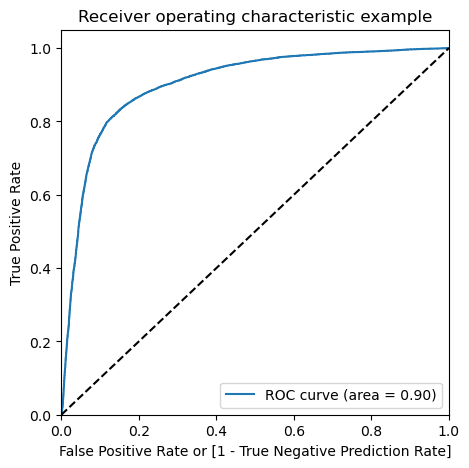

In [260]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [181]:
# Finding Optimal Cutoff Point

In [182]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122003,0,1,1,0,0,0,0,0,0,0,0
1,0,0.348249,0,1,1,1,1,0,0,0,0,0,0
2,0,0.309163,0,1,1,1,1,0,0,0,0,0,0
3,0,0.404238,0,1,1,1,1,1,0,0,0,0,0
4,0,0.511677,1,1,1,1,1,1,1,0,0,0,0


In [183]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.692970     0.977603     0.408337
0.2          0.2  0.754925     0.955153     0.554697
0.3          0.3  0.793499     0.925187     0.661810
0.4          0.4  0.819992     0.894287     0.745697
0.5          0.5  0.836297     0.860224     0.812370
0.6          0.6  0.840186     0.814341     0.866031
0.7          0.7  0.825850     0.740460     0.911240
0.8          0.8  0.758684     0.569214     0.948154
0.9          0.9  0.615097     0.249533     0.980662


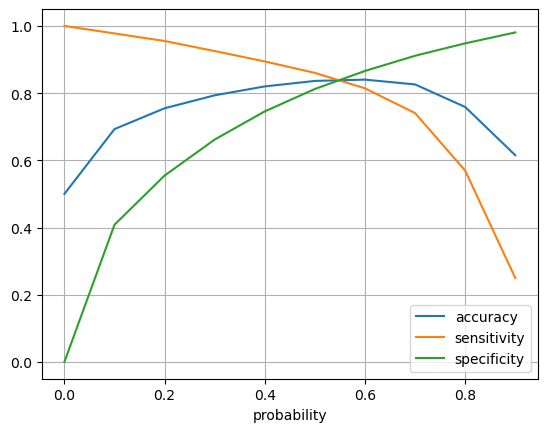

In [184]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In [ ]:
# Initially we selected the optimum point of classification as 0.5.

# From the above graph, we can see the optimum cutoff is around 0.54

In [185]:
#Create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.122003,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.348249,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.309163,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.404238,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.511677,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [186]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.836297     0.860224     0.812370
0.51         0.51  0.837282     0.855921     0.818644
0.52         0.52  0.838060     0.852136     0.823984
0.53         0.53  0.838967     0.847107     0.830827
0.54         0.54  0.839615     0.842182     0.837049
0.55         0.55  0.839952     0.837827     0.842078
0.56         0.56  0.840341     0.833627     0.847055
0.57         0.57  0.840471     0.829220     0.851721
0.58         0.58  0.840341     0.823984     0.856698
0.59         0.59  0.840186     0.818436     0.861935


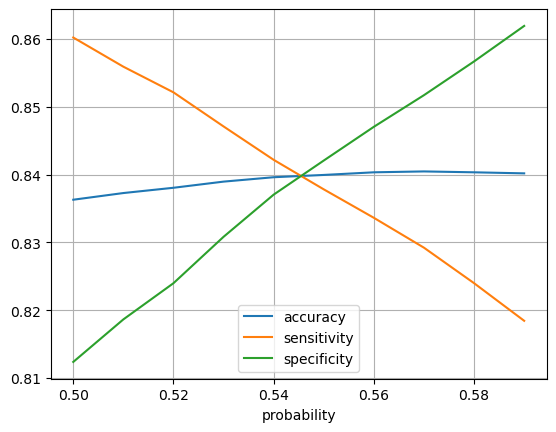

In [187]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

In [ ]:
# From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [188]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.122003,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.348249,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.309163,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.404238,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.511677,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [258]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8396153048527581


In [193]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16145  3143]
 [ 3044 16244]]


In [194]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Calculating specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculating false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# Positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8421816673579428
Specificity =  0.8370489423475737
False Positive Rate =  0.16295105765242637
Precision =  0.837881054314747
True Negative Prediction Rate =  0.8413674501016207


In [195]:
# Precision and recall tradeoff

In [199]:
from sklearn.metrics import precision_recall_curve

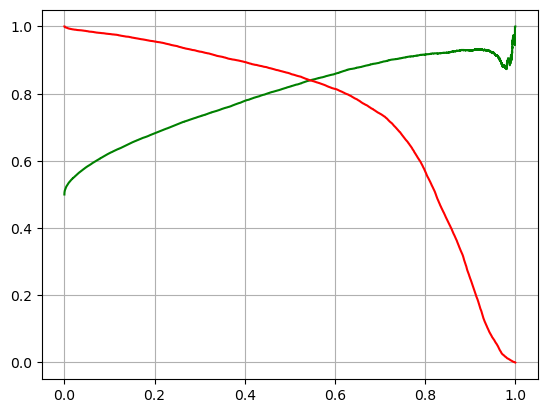

In [200]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

In [ ]:
# Evaluating model based on both train and test


In [ ]:
# Making predictions on the test set
# Transforming and feature selection for test data

In [201]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
29459,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
70682,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,0.000721,0.000521,...,0,1,0,0,1,0,0,1,0,0


In [202]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [203]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [ ]:
# Predicting the target variable

In [204]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.776599
41952    0.505979
98938    0.000307
29459    0.110580
70682    0.008890
58317    0.223188
4860     0.005475
16890    0.724945
61329    0.674624
94332    0.507917
dtype: float64


In [205]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.776599
41952,0.505979
98938,0.000307
29459,0.110580
70682,0.008890


In [206]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [207]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [208]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.776599
41952,0,0.505979
98938,0,0.000307
29459,0,0.110580
70682,0,0.008890


In [209]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.776599,1
41952,0,0.505979,0
98938,0,0.000307,0
29459,0,0.110580,0
70682,0,0.008890,0


In [210]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8260193311854238

In [ ]:
# Metrics Evaluation

In [211]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6852 1420]
 [ 146  583]]


In [212]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [213]:
#Sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Calculating specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculating false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# Positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7997256515775034
Specificity =  0.8283365570599613
False Positive Rate =  0.17166344294003869
Precision =  0.291063404892661
True Negative Prediction Rate =  0.9791368962560731


In [214]:
## Results Explanation

In [216]:
print("The accuracy of the predicted model is: ", round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred), 2) * 100, "%")
print("The sensitivity of the predicted model is: ", round(TP3 / float(TP3 + FN3), 2) * 100, "%")
print("\nAs the model created is based on a sensitivity model, i.e., the True positive rate is given more importance as the actual and prediction of churn by a customer\n")


The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sensitivity model, i.e., the True positive rate is given more importance as the actual and prediction of churn by a customer



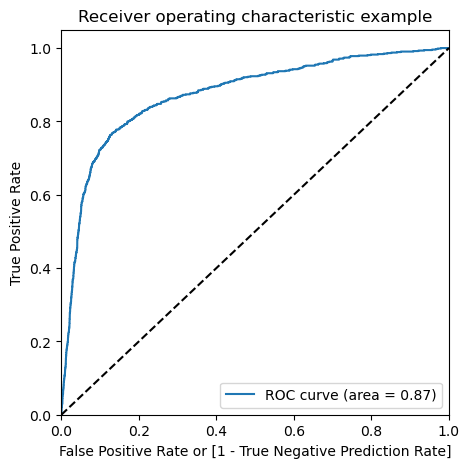

In [217]:
# ROC curve for the test DataFrame

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

In [218]:
# The AUC score for train DataFrame is 0.90 and the test DataFrame is 0.87.
# This model can be considered as a good model.


In [219]:
"""

Performing PCA for feature reduction

"""

'\n\nPerforming PCA for feature reduction\n\n'

In [ ]:
# Logistic Regression using PCA

In [220]:
# split the dateset into train and test DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the DataFrame

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,0,1,0,0,1,0,1,0,0,0
3,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
4,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,1,0,0,1,0,0,1,0,0


In [221]:
# importing PCA
# Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning.
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [222]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [223]:
#Viewing the PCA components
pca.components_

array([[ 1.17750519e-02,  5.40032377e-03,  9.90814688e-03, ...,
         4.04232735e-03,  4.22858838e-02, -1.74153928e-04],
       [ 2.31398320e-03,  7.96539265e-04, -4.70476543e-04, ...,
        -6.62423729e-01,  7.45287606e-01, -2.29800279e-04],
       [-2.22340985e-03, -6.81634175e-03, -6.49274743e-03, ...,
        -4.94674913e-01, -3.69638848e-01,  1.01837385e-03],
       ...,
       [-0.00000000e+00,  2.08397233e-15,  1.13912728e-15, ...,
         4.79463163e-17, -1.53953658e-18, -1.53078717e-17],
       [-0.00000000e+00, -1.49979560e-15,  2.26786717e-15, ...,
         2.10165031e-17,  2.21221975e-17,  5.41053964e-17],
       [ 0.00000000e+00,  8.97173582e-16, -7.47183419e-16, ...,
        -4.63927314e-18,  1.84183076e-19, -2.08585696e-17]])

In [224]:
# Performing Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6738 1534]
 [ 124  605]] 

Accuracy of the logistic regression model with PCA:  0.8157982446394845


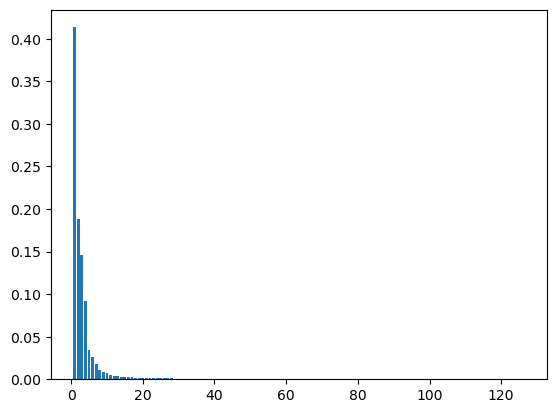

In [227]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

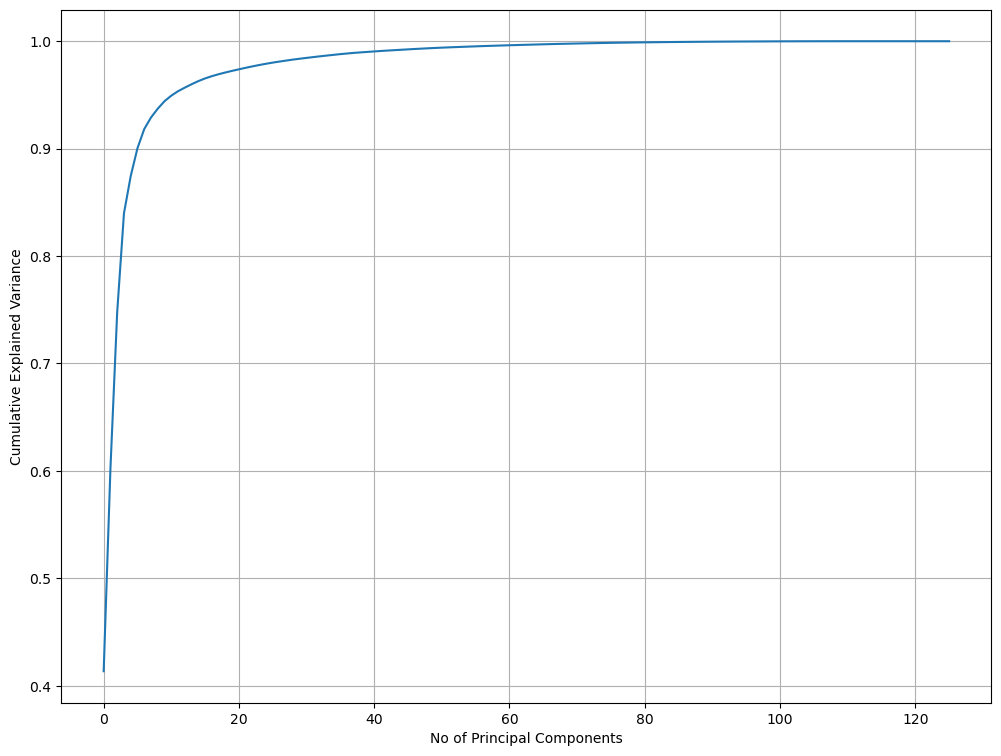

In [228]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot - plotting the cumulative variance against the number of components
# plotting the cumulative variance against the number of components
fig = plt.figure(figsize=[12,9])
plt.plot(var_cumu)
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [229]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([41.4, 60.3, 74.9, 84.1, 87.6, 90.2, 92. , 93.1, 93.9, 94.6, 95.1,
       95.5, 95.8, 96.1, 96.4, 96.7, 96.9, 97.1, 97.3, 97.5, 97.6, 97.7,
       97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8,
       98.9, 99. , 99.1, 99.2, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

In [ ]:
# 90% of the data can be explained with 8 PCA components

In [230]:
# Fitting the DataFrame with the 8 explainable components

In [231]:
pca = PCA(n_components=15)

train_pca = pca.fit_transform(X_train_sm)
print("Dimension for Train DataFrame using PCA: ", train_pca.shape)

test_pca = pca.transform(X_test)
print("Dimension for Test DataFrame using PCA: ", test_pca.shape)

Dimension for Train DataFrame using PCA:  (38576, 15)
Dimension for Test DataFrame using PCA:  (9001, 15)


In [232]:
logreg_pca = LogisticRegression()
logreg_pca.fit(train_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df: ", y_pred_df.shape)

Dimension of y_pred_df:  (9001, 1)


In [233]:
# Checking the data of y_pred_df
y_pred_df.head()

,0
0,1
1,0
2,0
3,0
4,0


In [234]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6298 1974]
 [ 207  522]] 

Accuracy of the logistic regression model with PCA:  0.7576935896011554


In [ ]:
## Using SVM Model

In [235]:
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC

model = SVC(C = 1, kernel='rbf')
model.fit(train_pca, y_train_sm)
y_pred = model.predict(test_pca)

In [236]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6384, 1888],
       [ 204,  525]], dtype=int64)

In [237]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7675813798466837
precision 0.21757148777455448
recall 0.720164609053498


In [238]:
## Hyperparameter Tuning
## We have multiple hyperparameters to optimise -

"""

The choice of kernel (linear, rbf etc.)
C
gamma
We'll use the GridSearchCV() method to tune the hyperparameters.

"""

"\n\nThe choice of kernel (linear, rbf etc.)\nC\ngamma\nWe'll use the GridSearchCV() method to tune the hyperparameters.\n\n"

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [240]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.821161,0.521747,8.492662,0.243976,1,0.01,"{'C': 1, 'gamma': 0.01}",0.846429,0.820971,0.839594,...,0.846551,0.016560,8,0.855833,0.865935,0.868710,0.878477,0.873729,0.868537,0.007667
1,17.303445,0.166283,8.374856,0.103760,1,0.001,"{'C': 1, 'gamma': 0.001}",0.832221,0.797290,0.787124,...,0.817358,0.020845,10,0.833588,0.821349,0.790430,0.849149,0.831455,0.825194,0.019529
2,15.763797,0.356735,7.975277,0.169138,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.808970,0.697683,0.796667,...,0.791962,0.048926,12,0.812842,0.690854,0.798269,0.847132,0.807146,0.791249,0.052859
3,21.490240,0.382705,8.473852,0.064526,10,0.01,"{'C': 10, 'gamma': 0.01}",0.880326,0.844735,0.848958,...,0.863210,0.016123,6,0.881543,0.887004,0.880792,0.883326,0.884357,0.883404,0.002198
4,19.495155,0.510040,8.765636,0.112408,10,0.001,"{'C': 10, 'gamma': 0.001}",0.806745,0.843404,0.842450,...,0.838936,0.021915,9,0.798410,0.864769,0.866732,0.849087,0.872240,0.850248,0.027036
5,16.143173,0.283550,8.371016,0.177464,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.810365,0.829158,0.791755,...,0.811803,0.030381,11,0.790988,0.847367,0.788812,0.796413,0.851062,0.814929,0.028128
6,21.957579,0.584058,8.331865,0.192000,100,0.01,"{'C': 100, 'gamma': 0.01}",0.880418,0.847997,0.849944,...,0.864289,0.015172,4,0.882624,0.891438,0.884640,0.886924,0.887298,0.886585,0.002955
7,21.569850,0.742689,8.740322,0.245926,100,0.001,"{'C': 100, 'gamma': 0.001}",0.879055,0.855858,0.849535,...,0.863963,0.012068,5,0.869029,0.881858,0.876819,0.877617,0.882155,0.877496,0.004752
8,18.351712,0.433217,8.727731,0.114412,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.849220,0.856766,0.848830,...,0.857136,0.009114,7,0.849202,0.868499,0.869233,0.875228,0.870894,0.866611,0.009012
9,26.509903,1.321704,9.372688,1.727830,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.889734,0.852838,0.864862,...,0.871462,0.014513,1,0.898925,0.905902,0.901475,0.899486,0.898590,0.900875,0.002705


In [241]:
# printing the optimal roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8714619485546204 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [242]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))

[[8199   73]
 [ 636   93]] 

accuracy 0.9212309743361848
precision 0.5602409638554217
sensitivity/recall 0.12757201646090535
roc_auc_score 0.5593735324084024


In [244]:
## Using Random Forest Model

In [243]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [245]:
# Making predictions
predictions = rfc.predict(X_test)

In [246]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [248]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)# Let's check the report of our default model
print(classification_report(y_test,predictions))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8272
           1       0.71      0.44      0.54       729

    accuracy                           0.94      9001
   macro avg       0.83      0.71      0.76      9001
weighted avg       0.93      0.94      0.93      9001



In [249]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9136271856773558 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [250]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [251]:
# fit
rfc.fit(X_train,y_train)
# predict
predictions = rfc.predict(X_test)

In [253]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8272
           1       0.74      0.23      0.35       729

    accuracy                           0.93      9001
   macro avg       0.84      0.61      0.66      9001
weighted avg       0.92      0.93      0.91      9001



In [254]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[8214   58]
 [ 563  166]] 

accuracy 0.9310076658149095
precision 0.7410714285714286
sensitivity/recall 0.22770919067215364
roc_auc_score 0.6103487926281463


In [ ]:
## 7.Model Selection


# Based on the above models the best model is first one i.e Logistic regression model which gives recall of 81% and ROC value of 0.89

In [255]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

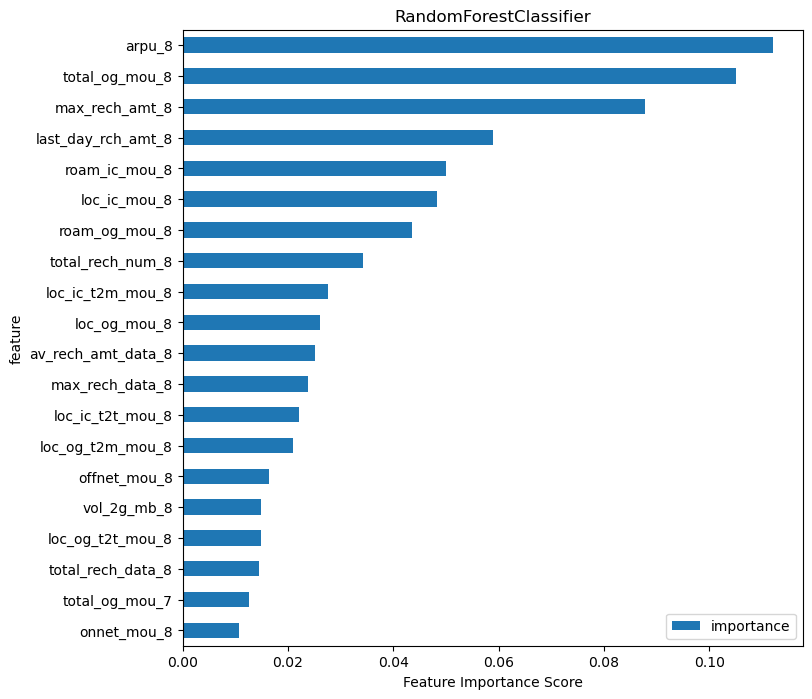

,importance
feature,
onnet_mou_8,0.010690
total_og_mou_7,0.012627
total_rech_data_8,0.014577
loc_og_t2t_mou_8,0.014804
vol_2g_mb_8,0.014861
offnet_mou_8,0.016402
loc_og_t2m_mou_8,0.020993
loc_ic_t2t_mou_8,0.022153
max_rech_data_8,0.023818


In [256]:
plot_feature_importances(rfc, X_train, y_train, top_n=20,title=rfc.__class__.__name__)

In [ ]:
## Above is the list of top 20 features with their scores which are important in predicting churn.

In [ ]:
8. Conclusion

# Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
# Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
# Cutomers with tenure less than 4 yrs are more likely to churn.
# Max Recharge Amount is a strong feature to predict churn.
# Logistic Regression produced the best prediction results aftter tackling Class Imbalance